# Problema 3 
# Selección de Modelos

In [1]:
%matplotlib inline

import numpy as np
from numpy import *
import matplotlib.pylab as plt
from matplotlib.pyplot import *
import scipy.stats as sp

with open('datos.dat') as g:
    t,y,err = np.genfromtxt(g, usecols=(0,1,2), unpack=True, dtype=float)
g.close()

# a)
Utilizamos AIC y BIC para seleccionar el grado "óptimo" del polinomio que deberíamos ajustar en el Problema 1.a)

In [2]:
n=len(t)
t1=0.4
t4=0.7

filt = (t1<t) & (t<t4)      

col1 = np.zeros(n)
for i in range(n):   
    if filt[i] == True:
        col1[i] = -1

M = col1
AIC = []
BIC = []
polin = []

for p in range(9):    #Defino el grado del polinomio a ajustar

#Armo la matriz de diseño:
    for i in range(p+1):
        M = np.column_stack((M, t**i))
    
    polin.append(i)
    B = np.linalg.inv(np.matmul(M.T,M))
    C = np.matmul(M.T,y)
    param = np.matmul(B,C)
    err = np.array(err)
    err1 = err**2
    V = np.diag(err1)
    V1 = np.linalg.inv(V)
    delta = (y - np.matmul(M,param))
    S = np.matmul(delta.T,V1)
    S = np.matmul(S,delta)
    k = (p+2)
    AIC.append(S+2*k+(2*k*(k+1))/(n-k-1))
    BIC.append(S+k*np.log(n))
    del M
    M = col1

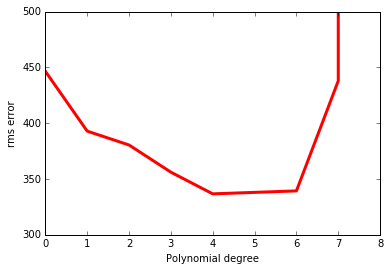

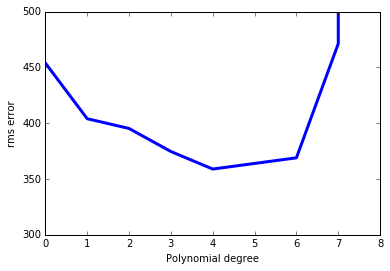

In [3]:
AIC = np.array(AIC)
BIC = np.array(BIC)

plt.plot(polin, AIC, color='red', linewidth=3)
plt.ylim(300.0, 500)
plt.xlabel('Polynomial degree')
plt.ylabel('rms error')
plt.savefig('plot_7.pdf')
plt.show()

plt.plot(polin, BIC, color='blue', linewidth=3)
plt.ylim(300.0, 500)
plt.xlabel('Polynomial degree')
plt.ylabel('rms error')
plt.savefig('plot_8.pdf')
plt.show()

Hacemos el plot con AIC y BIC juntos:

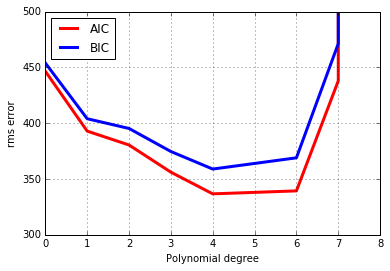

In [4]:
AIC = np.array(AIC)
BIC = np.array(BIC)

figure()

ylim(300.,500.) 
plot(polin, AIC, color='red', linewidth=3, label='AIC')
plot(polin, BIC, color='blue', linewidth=3, label='BIC')  
grid(True) 
xlabel('Polynomial degree')
ylabel('rms error')
legend(loc=2)
savefig('plot_9.pdf')

# b)
Ahora usamos el método de validación cruzada (cross-validation) para seleccionar el grado óptimo a ajustar en nuestro modelo. Para esto usaremos el método "K-fold cross-validation", para ello utilizamos el iterador proporcionado por Scikit Learn: sklearn.cross_validation.Kfold(n, n_folds=3, shuffle=False, random_state=None).

In [8]:
from sklearn.cross_validation import KFold

n=len(t)
t1=0.4
t4=0.7

filt = (t1<t) & (t<t4)      

col1 = np.zeros(n)
for i in range(n):   
    if filt[i] == True:
        col1[i] = -1

M = col1

kf = KFold(n, n_folds=10)
polin = []
rms_error = np.zeros(9)

for p in range(9):    #Defino el grado del polinomio a ajustar
    for train_index, test_index in kf:
        t_train = t[train_index]
        t_test = t[test_index]
        y_train = y[train_index]
        y_test = y[test_index]
        M_train = col1[train_index]
        M_test = col1[test_index]
        #Armo las matrices de diseño para el training set y el test set:
        for i in range(p+1):
            M_train = np.column_stack((M_train, t_train**i))
            M_test = np.column_stack((M_test, t_test**i))
        B = np.linalg.inv(np.matmul(M_train.T,M_train))
        C = np.matmul(M_train.T,y_train)
        param_tmp = np.matmul(B,C)
        err = np.array(err)
        err1 = err**2
        delta = (y_test - np.matmul(M_test,param_tmp))
        S = delta.T*(err[1])**(-1)
        S = np.matmul(S,delta)
        rms_error[p] = rms_error[p] + S/n
    polin.append(p)    


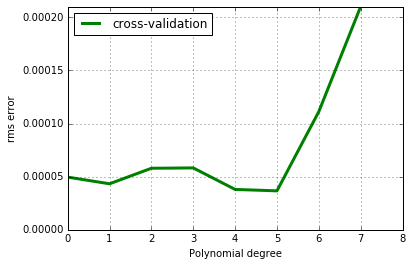

In [6]:
figure()

ylim(0.0,0.00021) 
plot(polin, rms_error, color='green', linewidth=3, label='cross-validation')

grid(True) 
xlabel('Polynomial degree')
ylabel('rms error')
legend(loc=2)
savefig('plot_10.pdf')